In [1]:
import numpy as np
from gym_sokoban.envs import SokobanEnv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def render_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    image = env.render(mode)

    plt.figure(dpi=200) 
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def print_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    print(env.room_state)

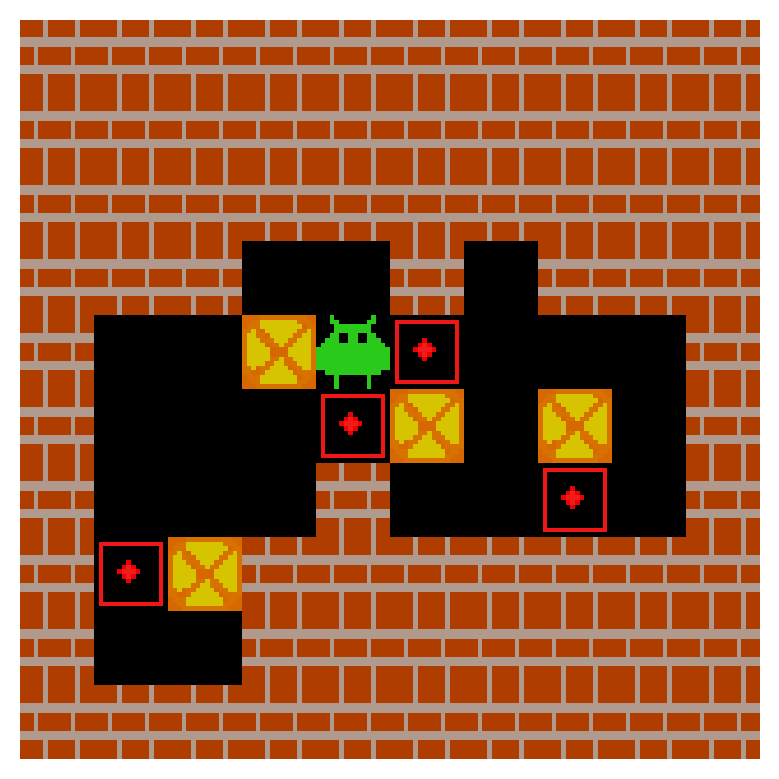

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 5 2 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [3]:
class SokobanEnvFixated(SokobanEnv):     
    def reset(self, second_player=False, render_mode='rgb_array'):

        self.room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 1, 1, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 1, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 4, 5, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 4, 1, 4, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 4, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.box_mapping = {(6, 7): (5, 7), (5, 4): (5, 5), (4, 5): (4, 3), (7, 1): (7, 2)}

        self.player_position = np.argwhere(self.room_state == 5)[0]
        self.num_env_steps = 0
        self.reward_last = 0
        self.boxes_on_target = 0

        starting_observation = self.render(render_mode)
        return starting_observation
  
env = SokobanEnvFixated(dim_room=(5, 5), max_steps=40, num_boxes=2, num_gen_steps=None, reset=True)
render_state(env)
print_state(env)

In [4]:
UP, DOWN, LEFT, RIGHT = 1, 2, 3, 4

def doStep(step):
    env.step(step)
    render_state(env)
    print_state(env)

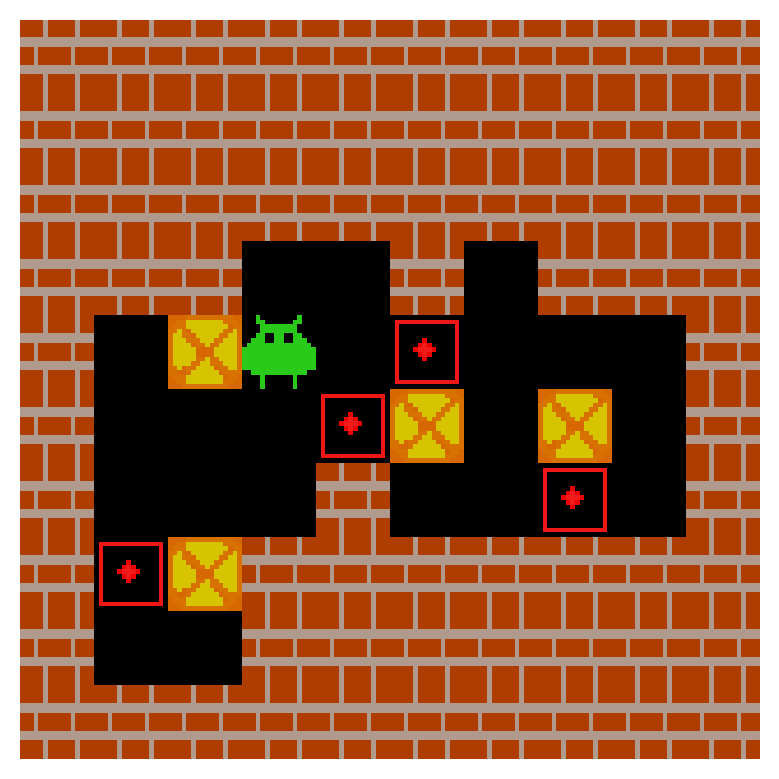

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 5 1 2 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [5]:
# ChatGPT-4o (Reasoning)
# Question:     Can you give me the next action (UP, DOWN, LEFT, RIGHT) to solve this Sokoban game?
#               All the boxes(4) must be pushed from the player(5) on to the buttons (2) over the empty spaces (1) avoiding the walls (0).
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 5 2 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
# Answer:       Thought for 1m 50s
#               The best immediate move is to go LEFT. Moving left from (4,4) will push the box at (4,3) into (4,2), which is an empty space. This is a legal and useful step toward repositioning the boxes for later pushes onto the buttons.
doStep(LEFT)

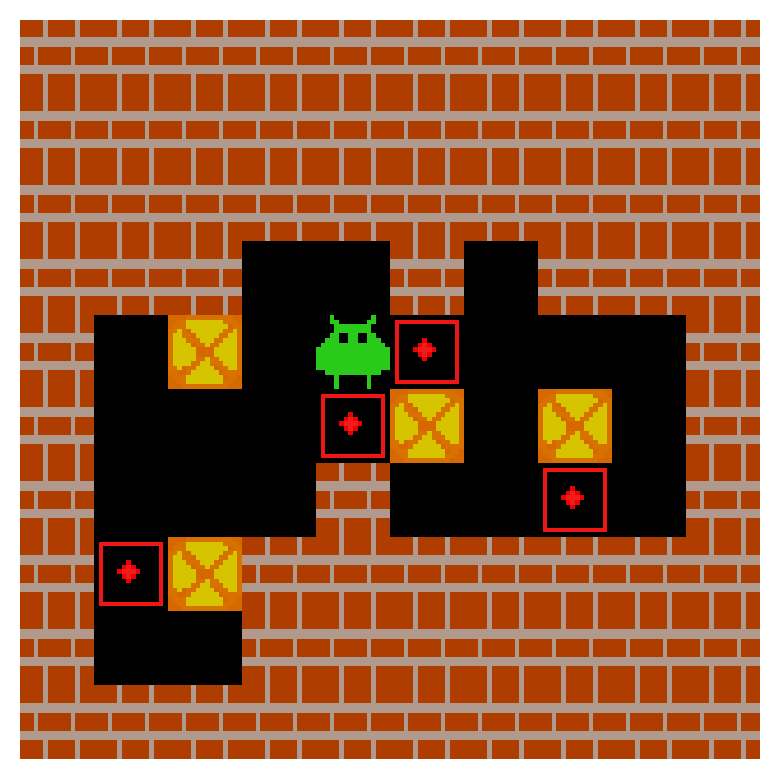

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 5 2 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 5 1 2 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 2m 3s
#               The next move is to go **RIGHT**. This begins repositioning the player along a path that will allow approaching one of the boxes—in this case, the box at (5,5)—so that it can later be pushed left onto its matching button at (5,4). From your current position at (4,3), moving right to (4,4) opens a route along the top row toward (4,6) and then down to (5,6) where you can later push the box left.
doStep(RIGHT)

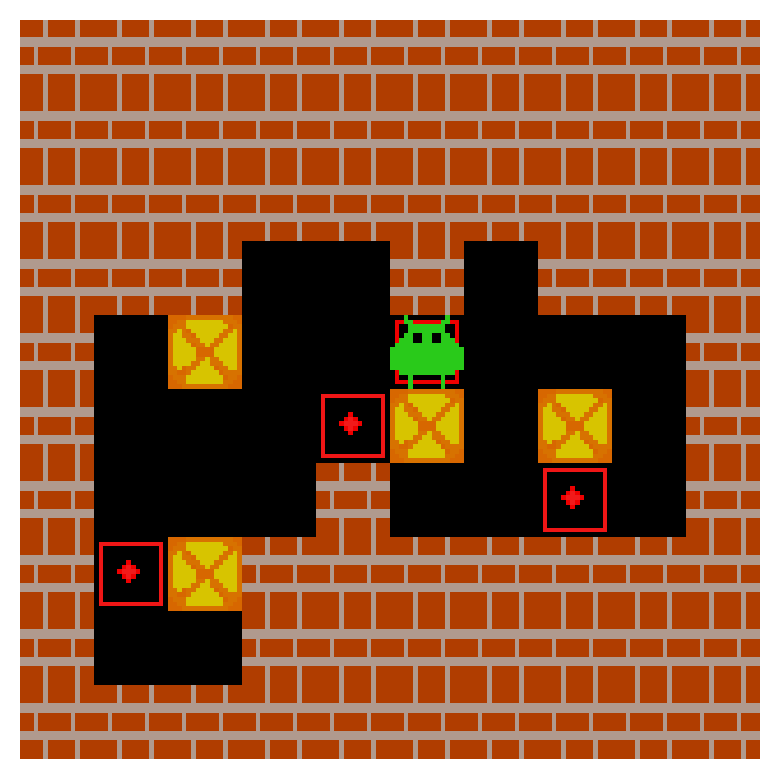

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 5 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 5 2 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 2m 34s
#               The next move is to go **RIGHT**. This move places the player onto the button at (4,5), beginning the repositioning needed to eventually get behind the box at (5,7). Once the player reaches (4,7), they can then push that box down directly onto the button at (6,7).
doStep(RIGHT)

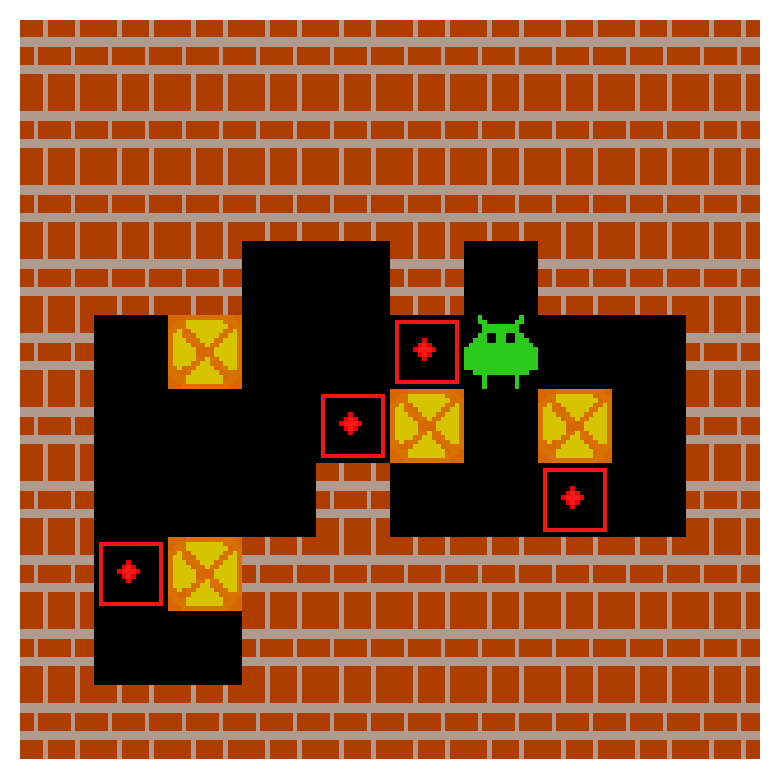

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 5 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 5 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 58s
#               The best next move is to go RIGHT. This positions you closer to Box B (currently at row5, col5). By moving right from your current position at (4,5) to (4,6), you can then plan to move down to (5,6) and push Box B left onto the button at (5,4).
doStep(RIGHT)

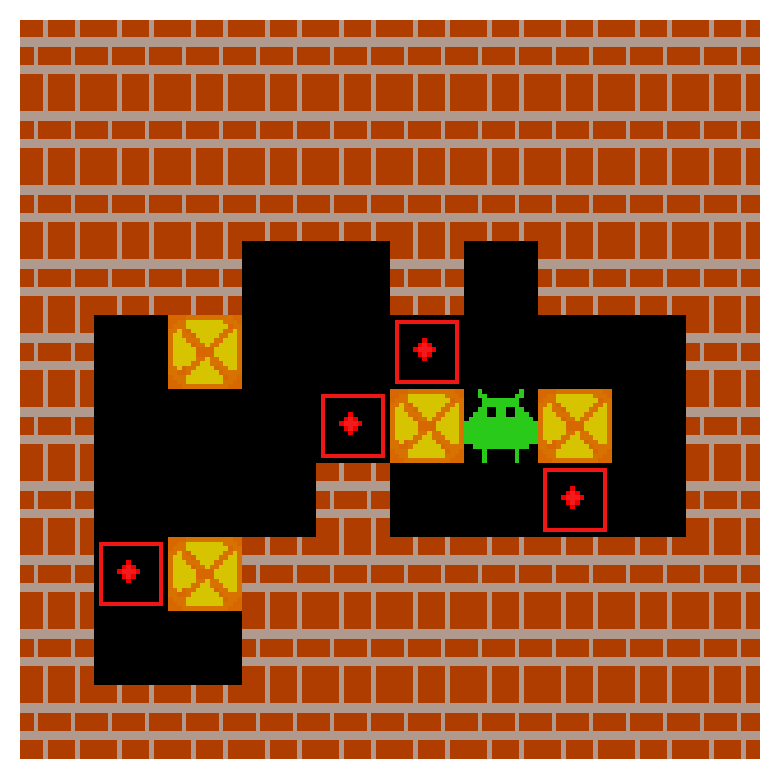

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 2 4 5 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [9]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 5 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 39s
#               The optimal next action is to go **DOWN**. This will bring the player from (4,6) to (5,6), positioning you adjacent to the box at (5,5). Once there, you'll be in the ideal position to push that box left directly onto the button at (5,4) in a subsequent move.
doStep(DOWN)

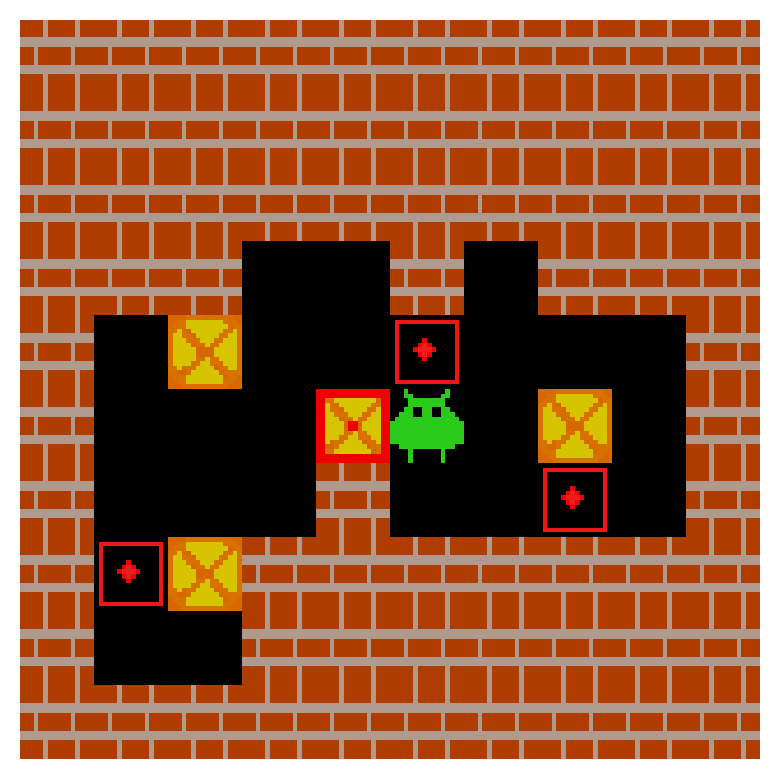

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 3 5 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [10]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 5 1 2 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 39s
#               The next move is to go **LEFT**. This will push the box at (5,5) directly onto the button at (5,4), which is exactly what we want.
doStep(LEFT)

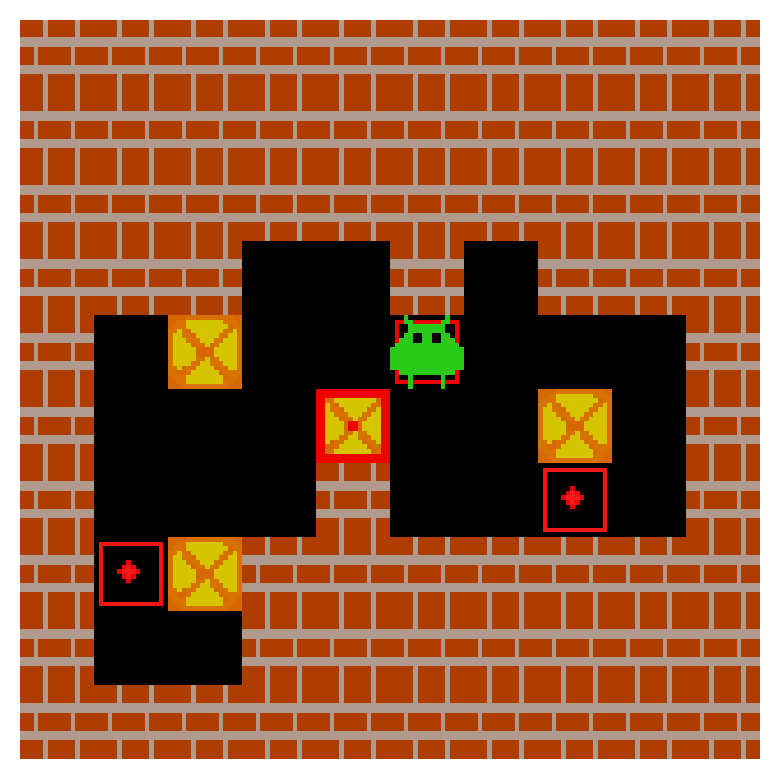

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 5 1 1 1 0]
 [0 1 1 1 3 1 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [11]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 1 3 5 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 14s
#               The next move is to go **UP**. This will bring you from (5,5) to (4,5), positioning you to eventually approach the box at (5,7) from above so you can push it downward onto the button at (6,7).
doStep(UP)

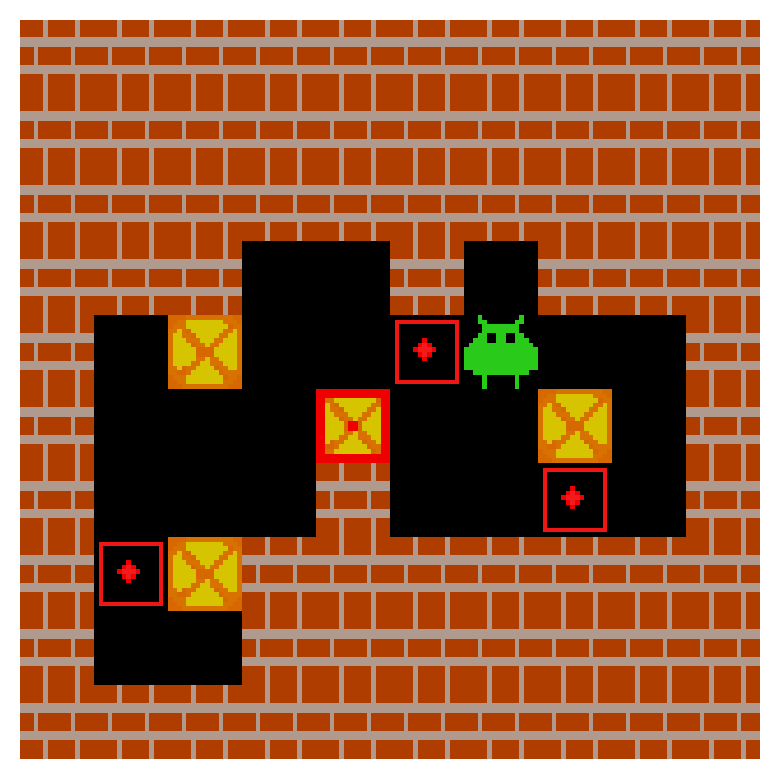

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 5 1 1 0]
 [0 1 1 1 3 1 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [12]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 5 1 1 1 0]
#                [0 1 1 1 3 1 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 42s
#               The next move is to go **RIGHT**. This will take you from (4,5) to (4,6), which sets you up to move to (4,7). Once you're at (4,7), you can push the box at (5,7) down onto the button at (6,7) in a subsequent move.
doStep(RIGHT)

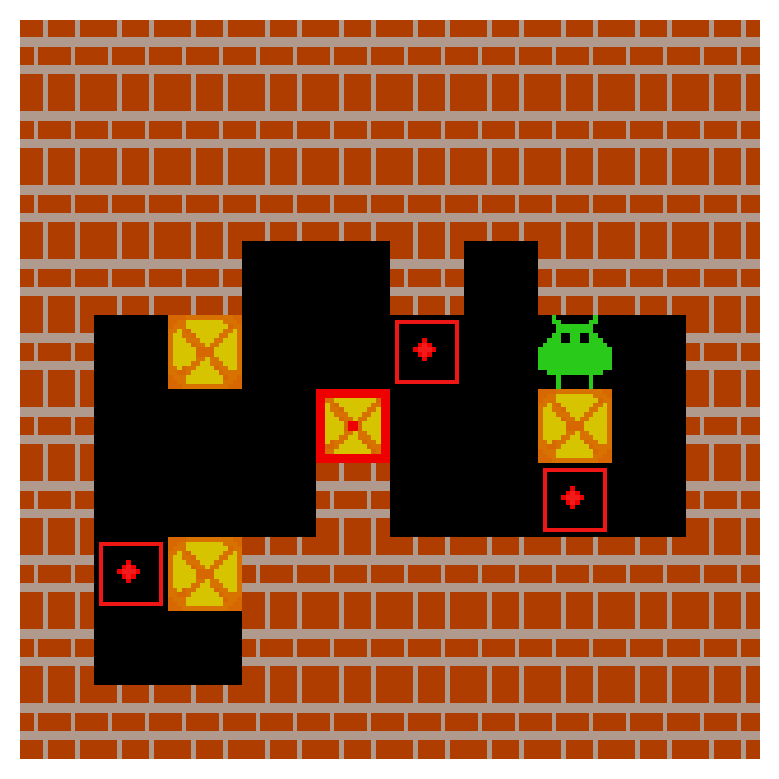

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 5 1 0]
 [0 1 1 1 3 1 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [13]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 5 1 1 0]
#                [0 1 1 1 3 1 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 1s
#               The optimal next move is to go **RIGHT**. Moving right from your current position at (4,6) will bring you to (4,7), which positions you directly above the box at (5,7). This setup will allow you to push that box downward onto its target button at (6,7) in your following move.
doStep(RIGHT)

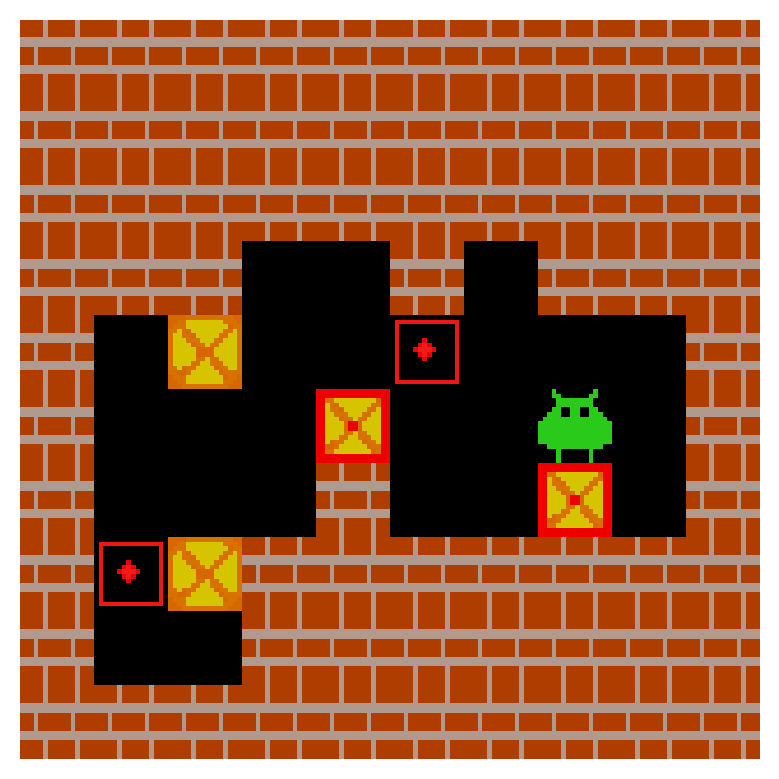

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 3 1 1 5 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [14]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 5 1 0]
#                [0 1 1 1 3 1 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 33s
#               The next move is to go **DOWN**. By moving down from your current position at (4,7), you'll push the box at (5,7) into the button at (6,7), turning it into a successfully placed box (now represented as a 3).
doStep(DOWN)

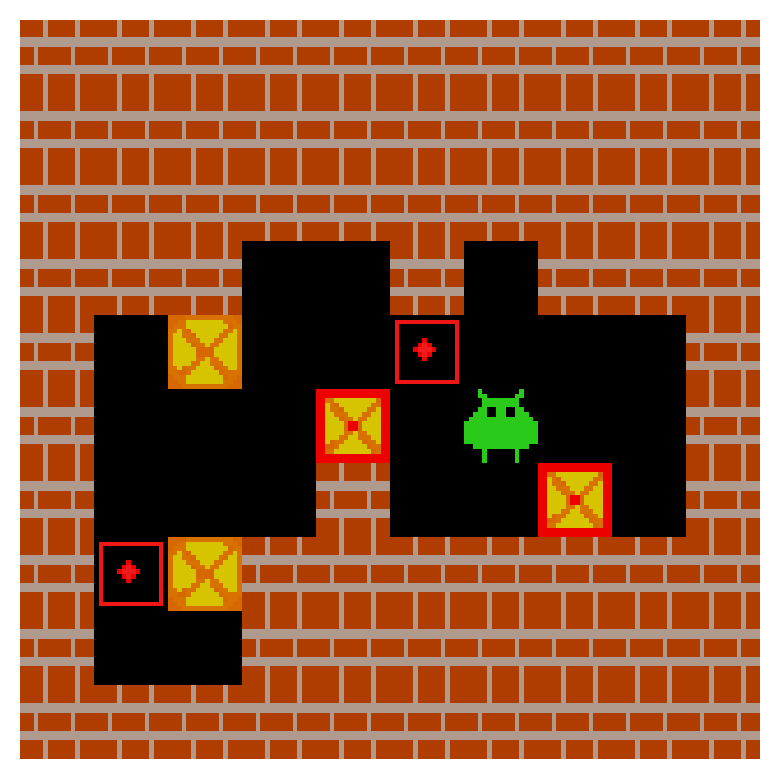

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 3 1 5 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 1 3 1 1 5 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 23s
#               The next move is to go **LEFT**. This will push the box at (5,5) onto the button at (5,4), completing the task of placing another box on a button.
doStep(LEFT)

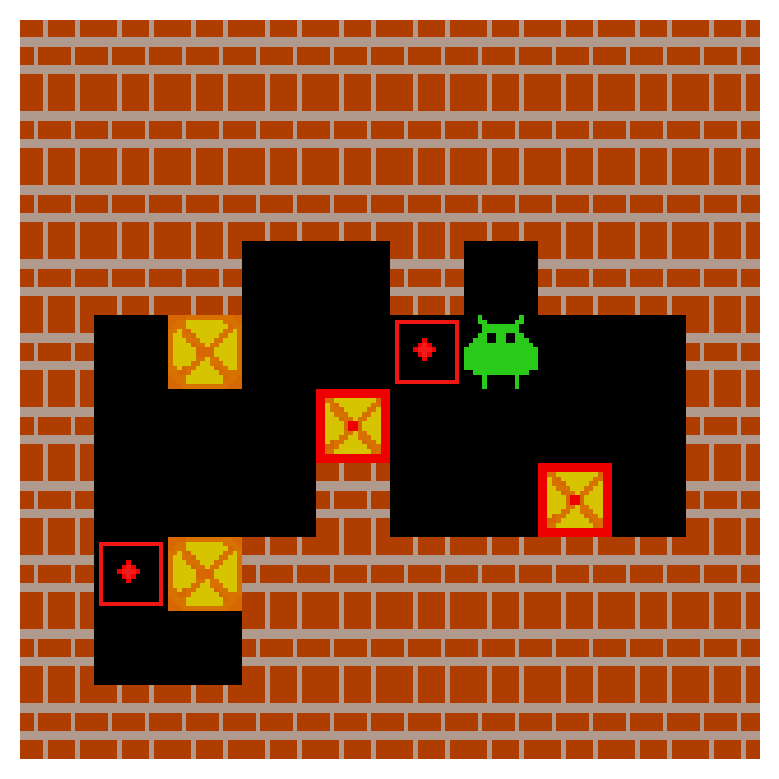

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 5 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 1 3 1 5 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 7s
#               The next move is to go **UP**. This will position you at (4,5) above the box at (5,5). This allows you to prepare for the next move where you can push that box further into place on its button at (5,4).
doStep(UP)

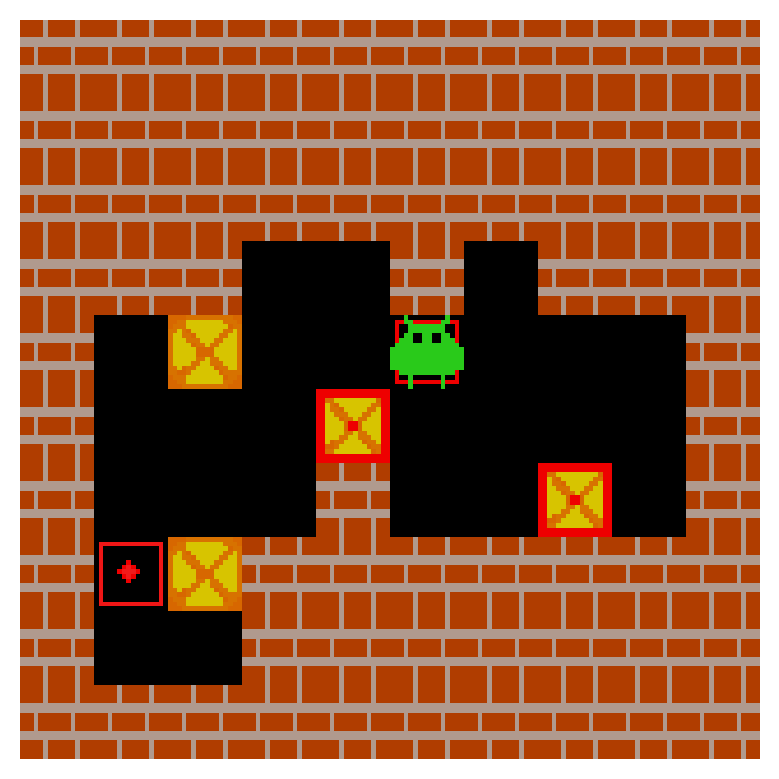

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 5 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 5 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 58s
#               The next move is to go **LEFT**. This will push the box at (5,5) onto the button at (5,4), completing the task of placing the second box on a button.
doStep(LEFT)

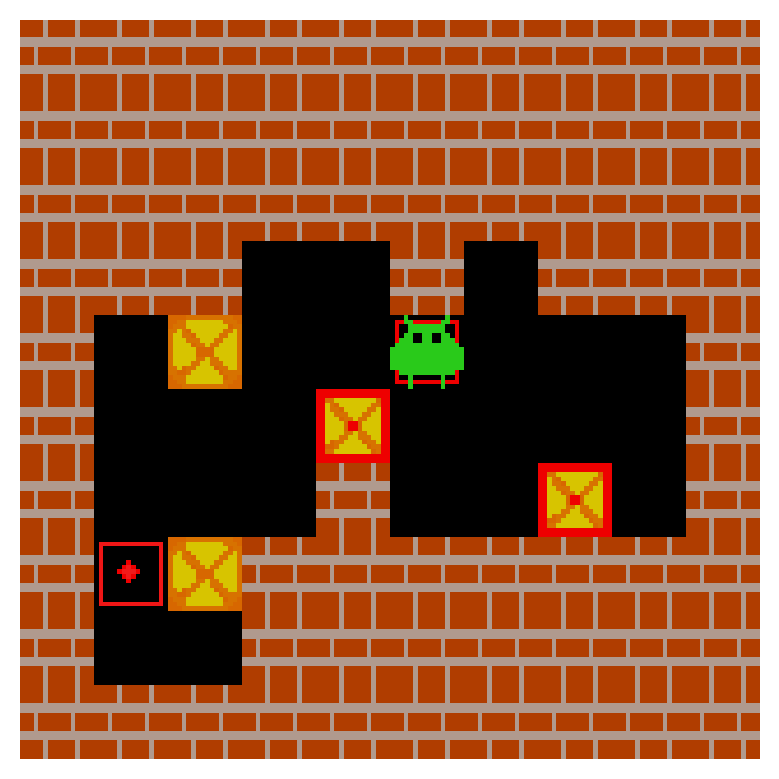

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 5 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 5 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 35s
#               The next move is to go **UP**. This will bring you to (4,5) and position you above the box at (5,5). You'll be able to push it left onto the button at (5,4), completing the second box placement.
doStep(UP)

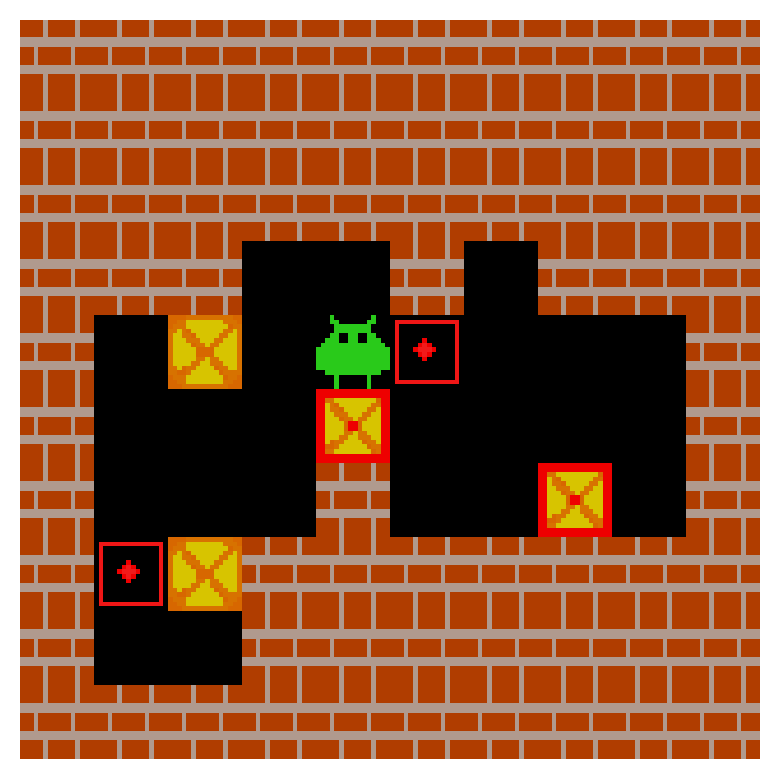

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 5 2 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 5 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 44s
#               The next move is to go **LEFT**. This will push the box at (5,5) onto the button at (5,4), successfully placing it on its target button.
doStep(LEFT)

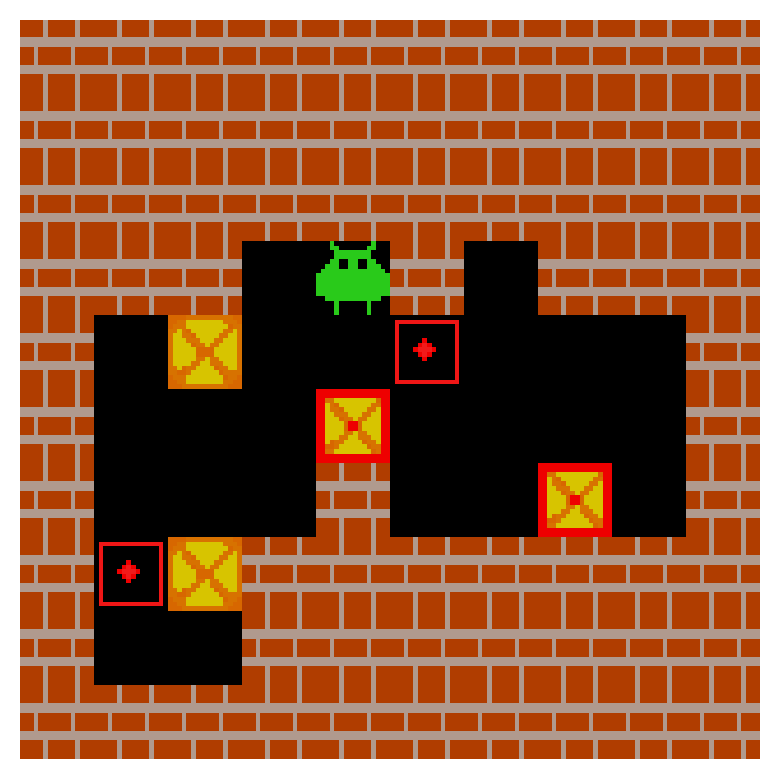

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 5 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 5 2 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 46s
#               The next move is to go **UP**. This will bring you to (4,5), positioning you to push the remaining box at (5,7) down onto its button at (6,7) in a future move.
doStep(UP)

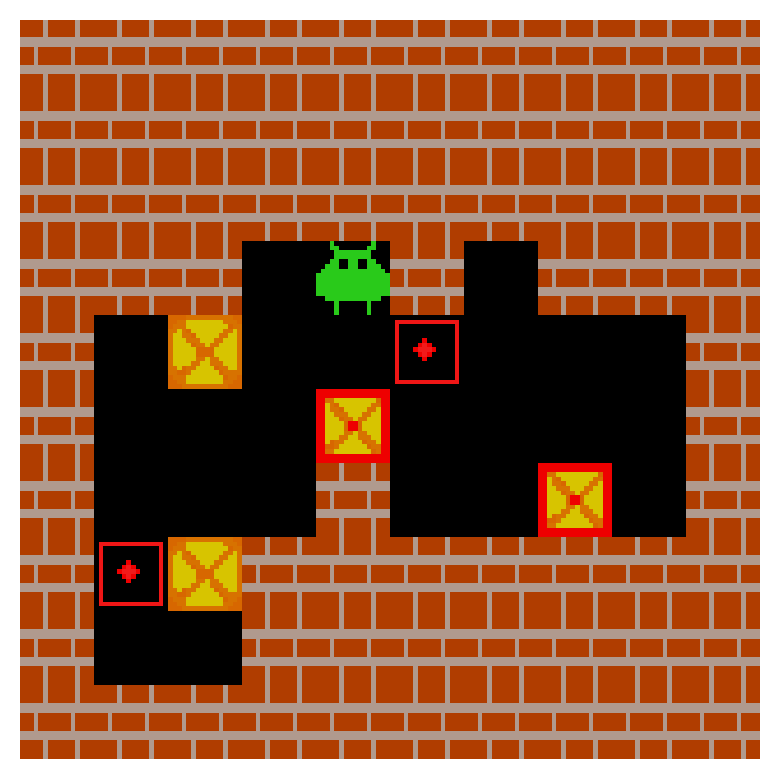

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 5 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 5 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 2m 14s
#               The next move is to go **RIGHT**. This will move you to (4,6), positioning you to eventually push the box at (5,7) down onto the button at (6,7).
doStep(RIGHT)

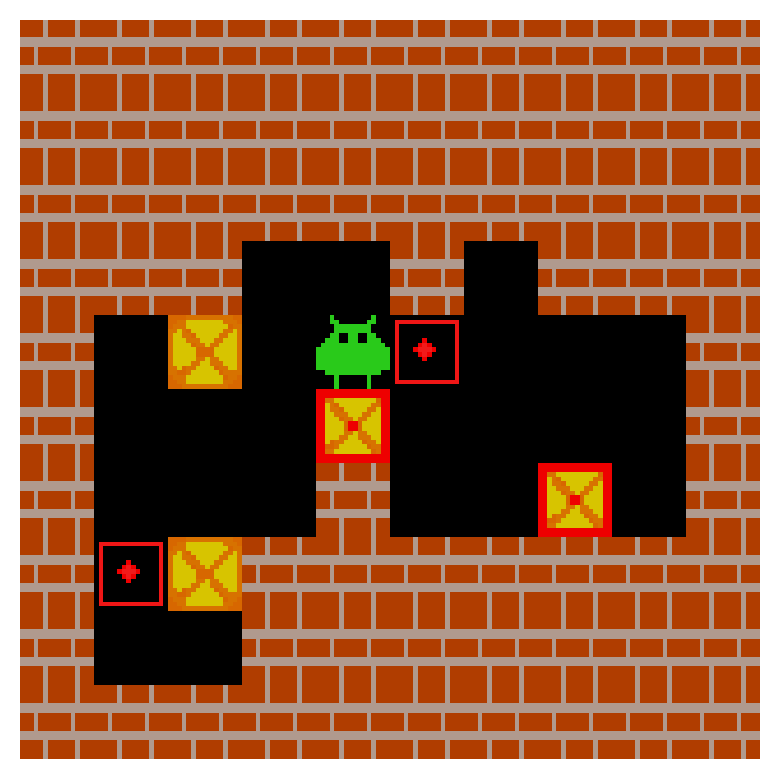

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 5 2 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 5 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 21s
#               The next move is to go **DOWN**. This will move you to (5,6), allowing you to position the player to push the box at (5,7) down onto the button at (6,7) in the next step.
doStep(DOWN)

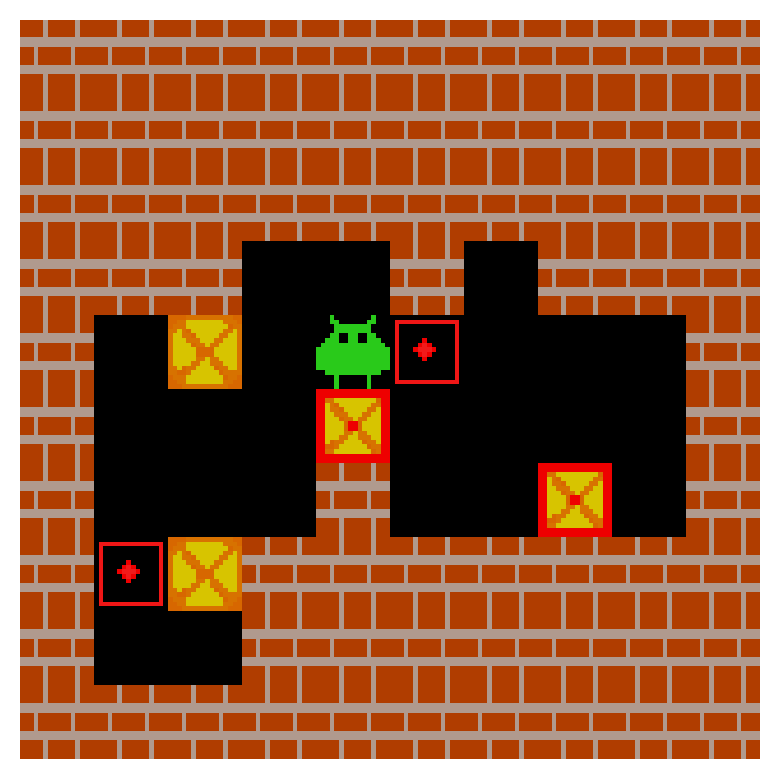

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 5 2 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 5 2 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 43s
#               The next move is to go **DOWN**. This will position you at (6,6), allowing you to push the box at (5,7) down onto the button at (6,7) in the next step.
doStep(DOWN)

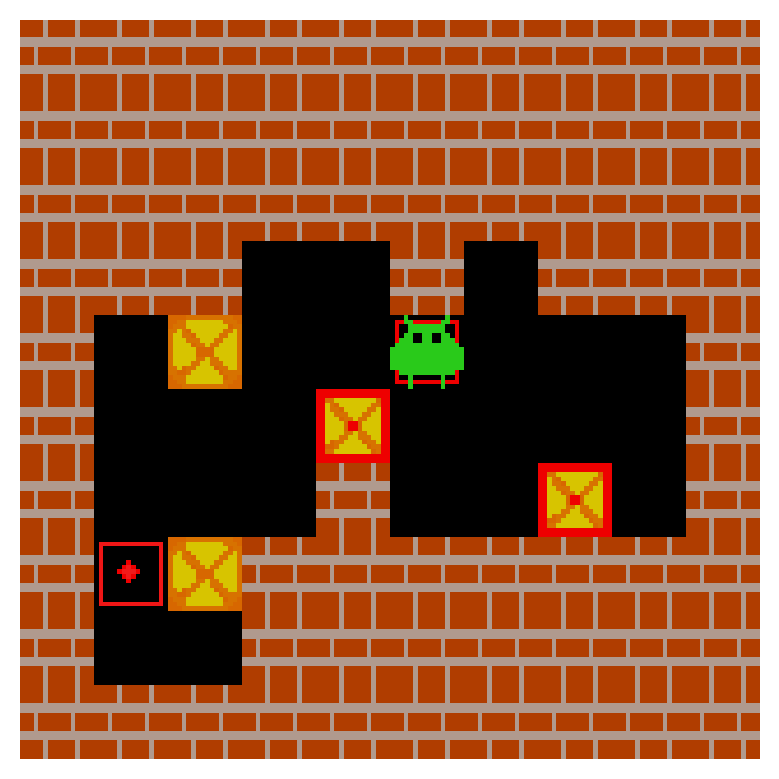

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 5 1 1 1 0]
 [0 1 1 1 3 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 5 2 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 22s
#               The next move is to go **RIGHT**. This will allow you to position the player to push the box at (6,7) onto the button at (7,7), completing the task.
doStep(RIGHT)

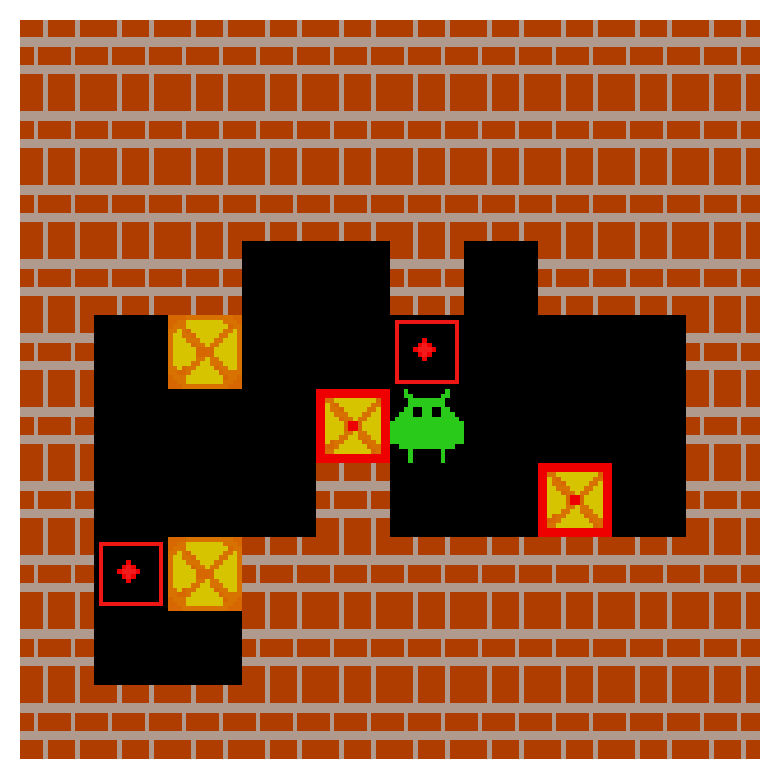

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 1 3 5 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 5 1 1 1 0]
#                [0 1 1 1 3 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 2m 3s
#               The next move is to go **DOWN**. This will position you to push the box at (6,8) onto the button at (7,8), completing the puzzle.
doStep(DOWN)

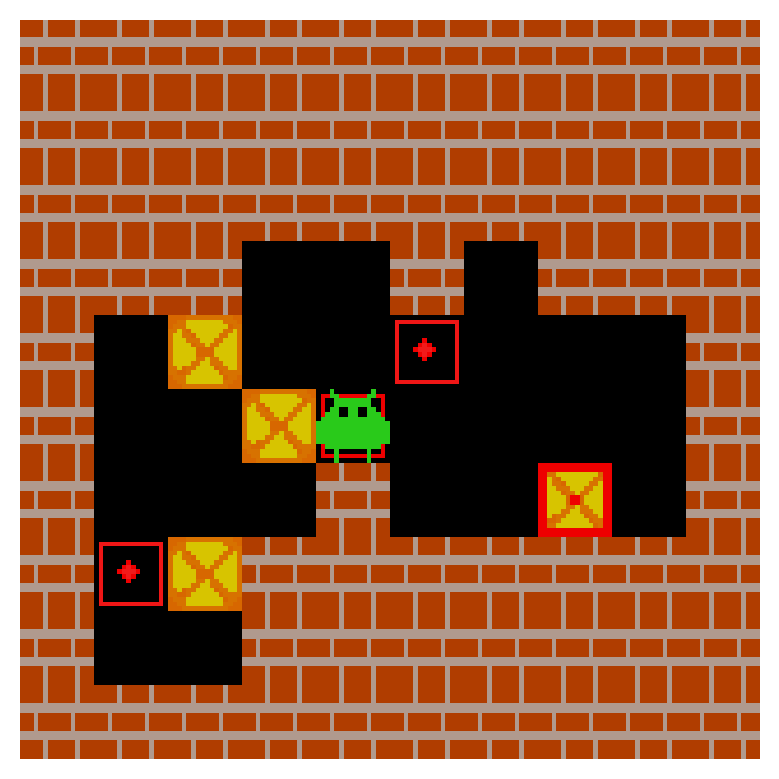

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 5 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 1 3 5 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 52s
#               The next action is to move **LEFT**. This will position the player to push the box at (5,6) onto the button at (5,5), continuing the puzzle-solving progress.
doStep(LEFT)

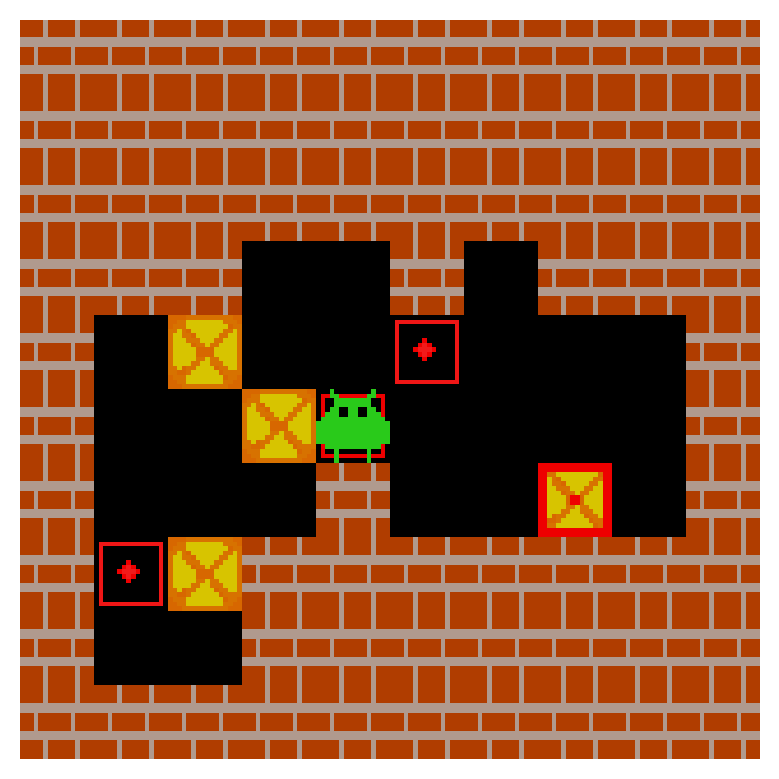

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 5 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 5 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 48s
#               The next action is to move **DOWN**. This will position the player to push the box at (5,4) onto the button at (6,4), further progressing the puzzle.
doStep(DOWN)

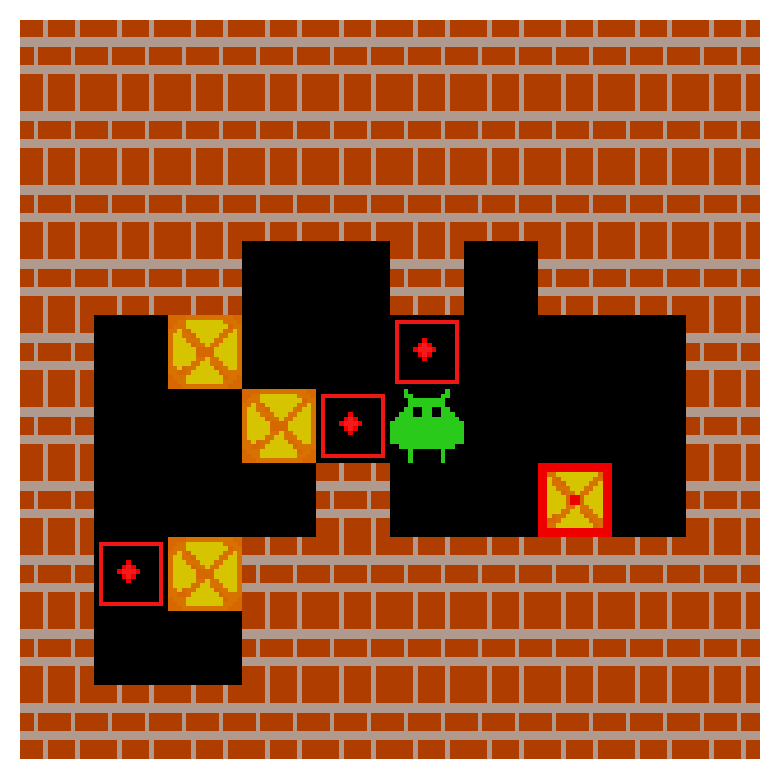

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 2 5 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 5 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 12s
#               The next action is to move **RIGHT**. This will push the box at (5, 4) into the target position, completing the puzzle!
doStep(RIGHT)

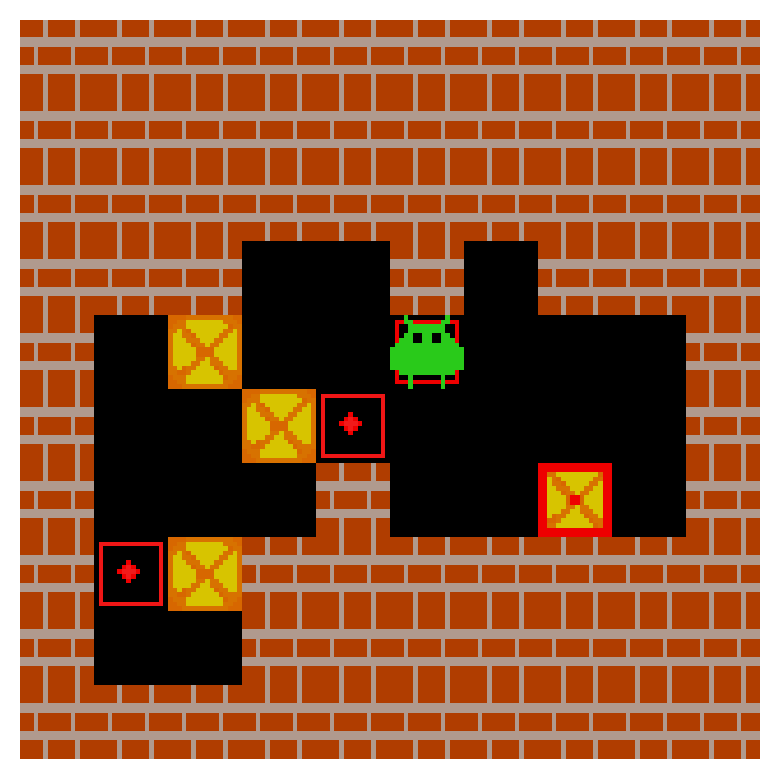

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 1 5 1 1 1 0]
 [0 1 1 4 2 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 2 5 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 2m 36s
#               The next action is to move **UP**. This will push the box at (6, 5) into the correct position, and continue making progress toward solving the puzzle.
doStep(UP)

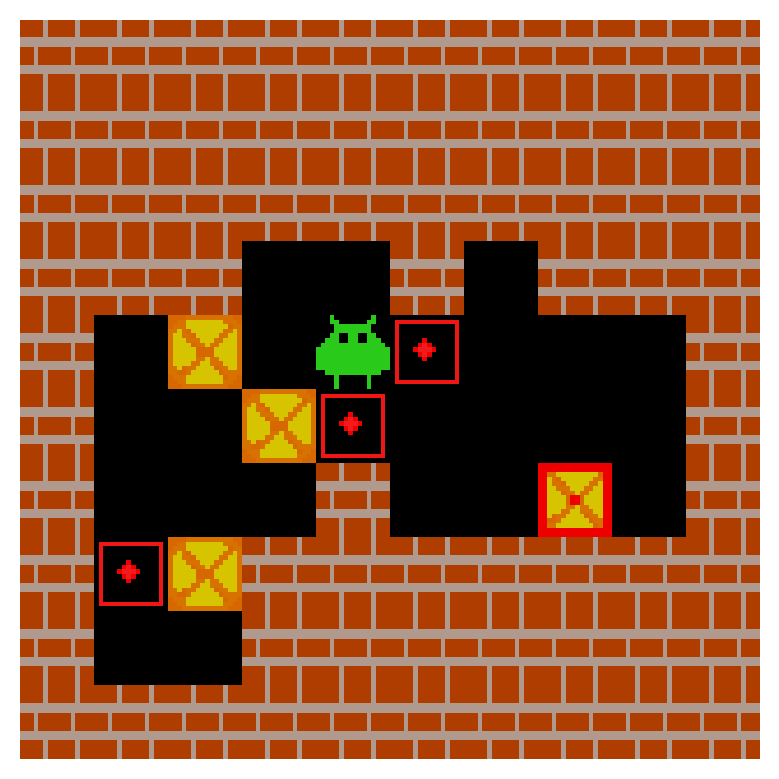

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 4 1 5 2 1 1 1 0]
 [0 1 1 4 2 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 1 5 1 1 1 0]
#                [0 1 1 4 2 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 47s
#               The next action is to **move LEFT**. This will move the box from position (4, 5) to position (4, 4), progressing towards the solution.
doStep(LEFT)

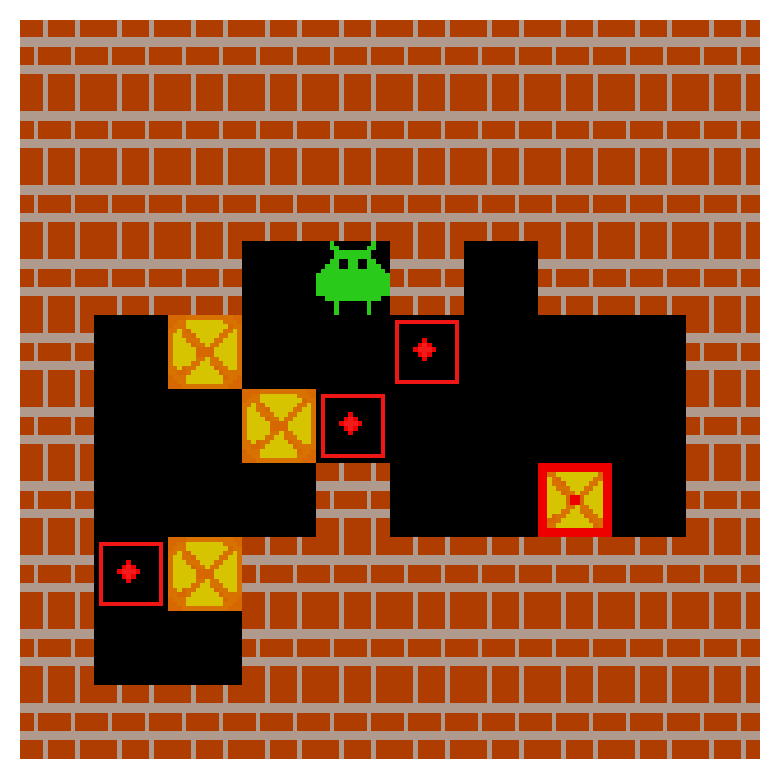

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 5 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 2 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 4 1 5 2 1 1 1 0]
#                [0 1 1 4 2 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 11s
#               The next action is to **move UP**. This will move the box from position (4, 4) to position (3, 4), bringing us closer to the goal.
doStep(UP)

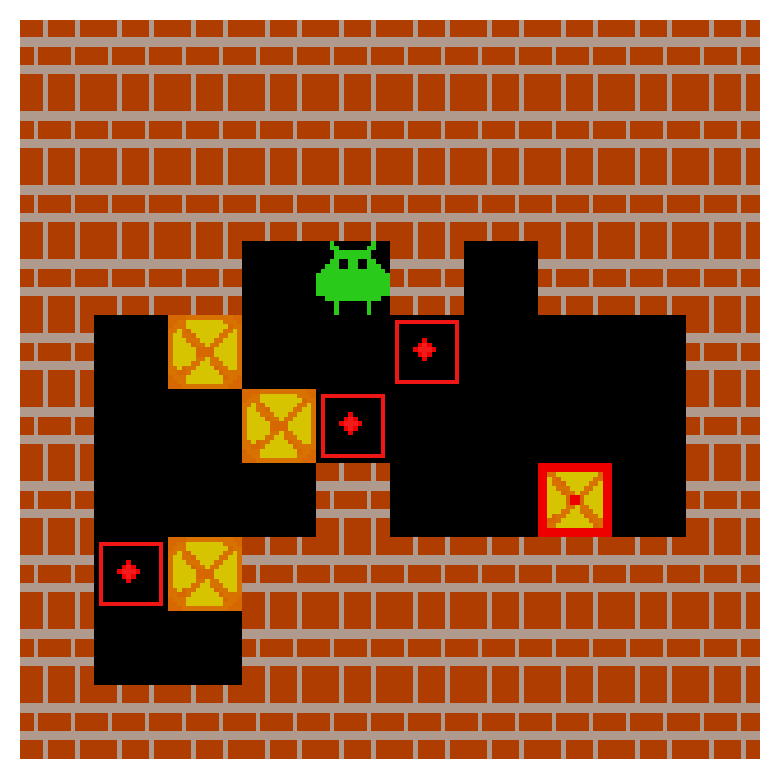

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 5 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 2 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 5 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 2 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 46s
#               The next action is to **move UP** again. This will move the box from position (3, 4) to position (2, 4), getting even closer to the goal.
doStep(UP)

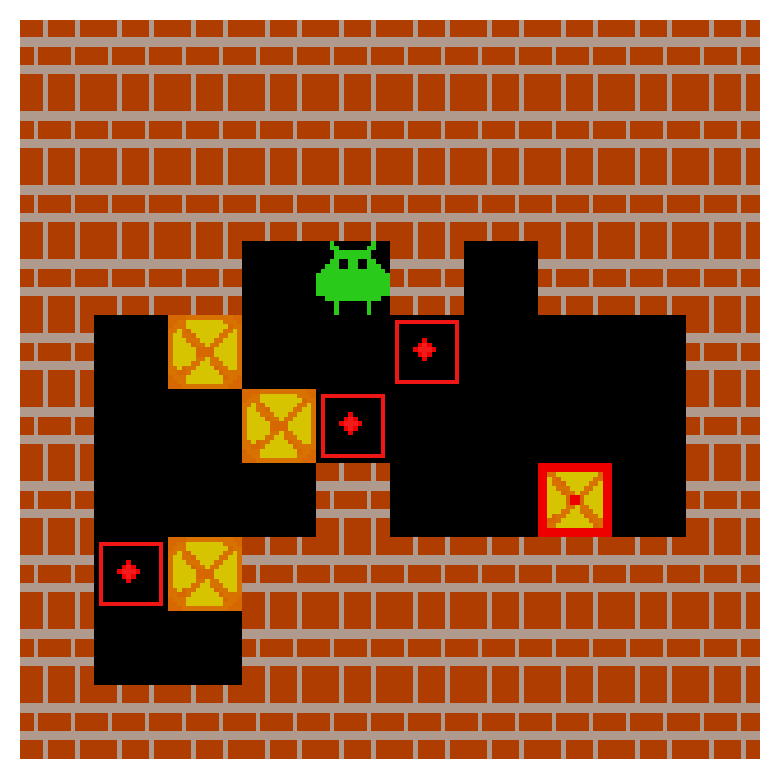

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 5 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 2 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 5 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 2 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 24s
#               The next action is to **move UP** again. This will move the box from position (2, 4) to position (1, 4), getting you even closer to the goal.
doStep(UP)

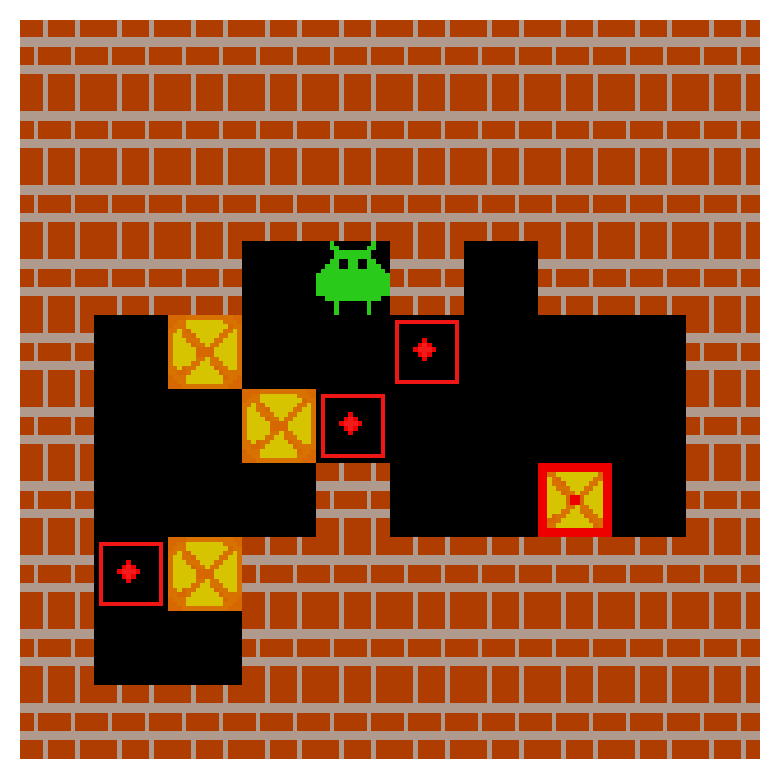

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 5 0 1 0 0 0]
 [0 1 4 1 1 2 1 1 1 0]
 [0 1 1 4 2 1 1 1 1 0]
 [0 1 1 1 0 1 1 3 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 5 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 2 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 25s
#               The next action is to **move UP** again. This will move the box from position (1, 4) to position (0, 4), reaching the final goal.
doStep(UP)

In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 5 0 1 0 0 0]
#                [0 1 4 1 1 2 1 1 1 0]
#                [0 1 1 4 2 1 1 1 1 0]
#                [0 1 1 1 0 1 1 3 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Thought for 1m 2s
#               It seems the game has already reached the final goal position. The action you're looking for is to **stop**, as the game has successfully finished. The object has moved to the final spot! 🎉

In [ ]:
# Result:       One box is placed correctly. 
#               The other boxes could be placed correctly, but the LLM thinks it finished
#               A total of 30 steps were performed.
#               The LLM thought for 42m 32s
env.num_env_steps

30